In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
# Load the CSV file
df = pd.read_csv('/content/drive/My Drive/Facialreco-data/train.csv')

In [14]:
df

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
...,...,...,...
28704,2,84 85 85 85 85 85 85 85 86 86 86 87 86 86 91 9...,Training
28705,0,114 112 113 113 111 111 112 113 115 113 114 11...,Training
28706,4,74 81 87 89 95 100 98 93 105 120 127 133 146 1...,Training
28707,0,222 227 203 90 86 90 84 77 94 87 99 119 134 14...,Training


In [15]:
df.size

86127

In [16]:
df.describe()

,emotion
count,28709.000000
mean,3.317427
std,1.876632
min,0.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,6.000000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28709 entries, 0 to 28708
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  28709 non-null  int64 
 1   pixels   28709 non-null  object
 2   Usage    28709 non-null  object
dtypes: int64(1), object(2)
memory usage: 673.0+ KB


In [18]:
print(df.shape)


(28709, 3)


In [22]:
df['emotion'].value_counts()

3    7215
6    4965
4    4830
2    4097
0    3995
5    3171
1     436
Name: emotion, dtype: int64

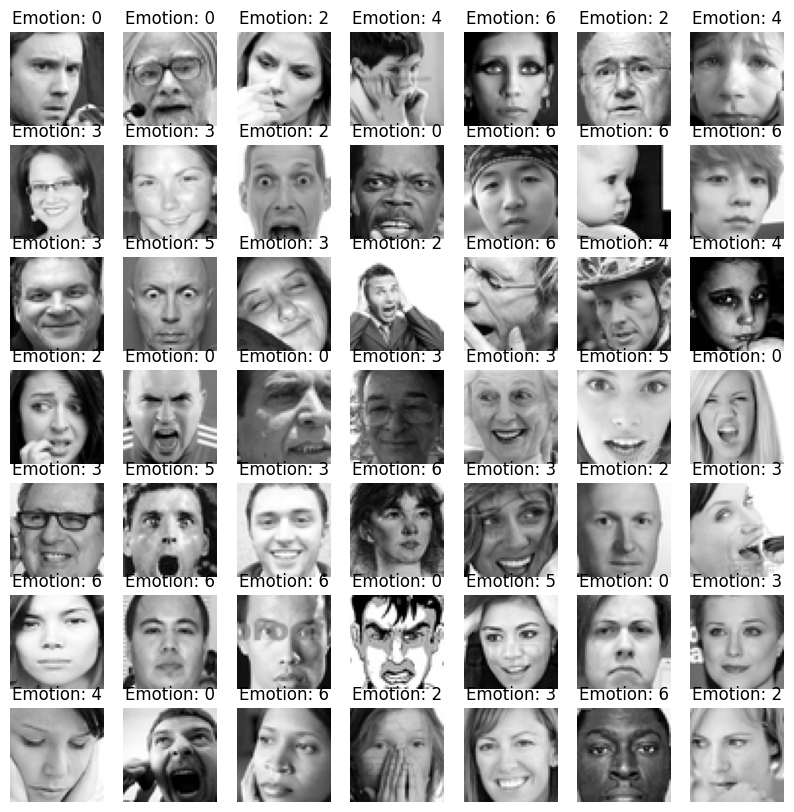

In [21]:
# Extract pixel values and emotion labels
pixels = df['pixels'].values
emotions = df['emotion'].values

# Convert pixel values from string to numeric
pixels = np.array([np.fromstring(pixel, dtype=int, sep=' ') for pixel in pixels])

# Reshape the pixel values to their original image dimensions
images = pixels.reshape(-1, 48, 48)

# Display some sample images
fig, axes = plt.subplots(7, 7, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i], cmap='gray')
    ax.set_title(f'Emotion: {emotions[i]}')
    ax.axis('off')

plt.show()

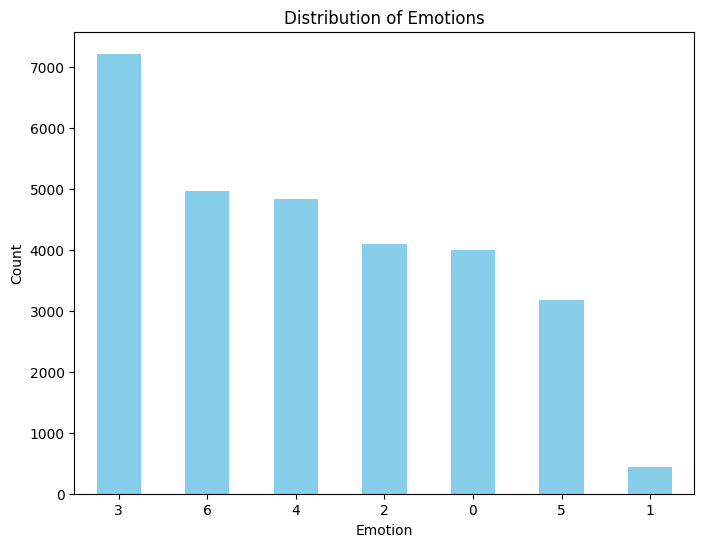

In [24]:
# Plot emotion distribution
plt.figure(figsize=(8, 6))
df['emotion'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Emotions')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

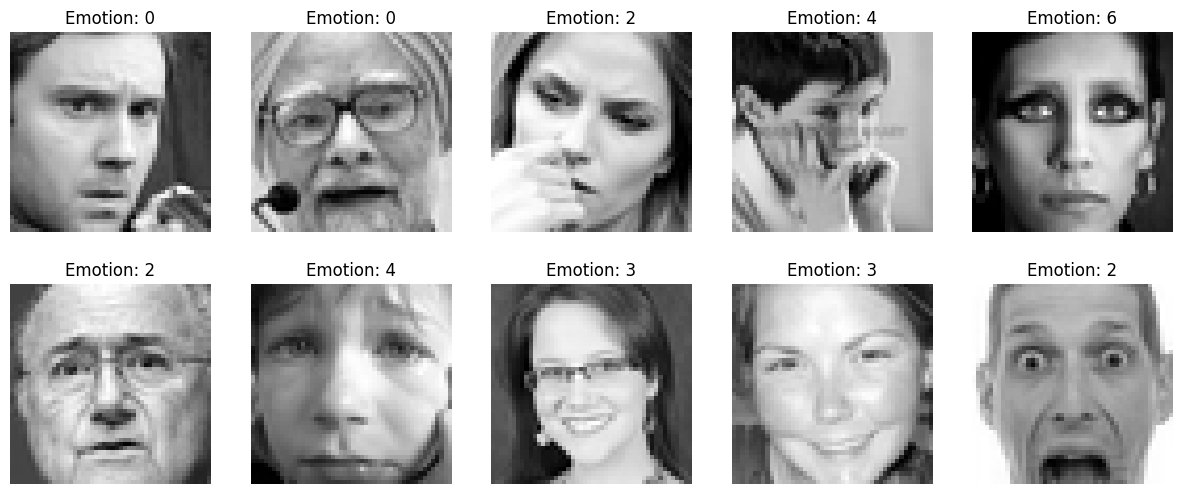

In [25]:
# Extract image characteristics
pixel_values = df['pixels'].apply(lambda x: np.array(x.split(), dtype=np.uint8))
average_pixel_intensity = pixel_values.apply(lambda x: np.mean(x))
std_dev_pixel_intensity = pixel_values.apply(lambda x: np.std(x))
image_size = pixel_values.apply(lambda x: len(x))

# Visualize sample images
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(pixel_values[i].reshape(48, 48), cmap='gray')
    ax.set_title(f"Emotion: {df['emotion'][i]}")
    ax.axis('off')
plt.show()